In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [2]:
x,y = make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_classes=2,n_clusters_per_class=1)

In [3]:
print(x.shape,y.shape)

(1000, 2) (1000,)


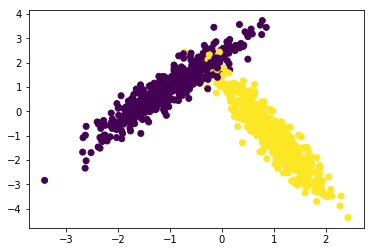

In [4]:
plt.scatter(x[:,0],x[:,1],c=y)

In [5]:
X = np.ones((x.shape[0],x.shape[1]+1))
X[:,1:] = x
print(X.shape)

(1000, 3)


# Alogarithm

In [6]:
def hypothesis(theta,x):
    return 1/(1+np.exp(-np.dot(theta,x)))

In [7]:
def pred(theta,x):
    hx = hypothesis(theta,x)
    if hx>=0.5:
        return 1
    else:
        return 0

In [8]:
def error(theta,x,y):
    err=0
    m = x.shape[0]
    for ix in range(m):
        hx = hypothesis(theta,x[ix])
        err += y[ix]*np.log2(hx)+(1-y[ix])*np.log2(1-hx)
    return -err/m

In [9]:
def gradient(x,y,theta):
    grad = np.zeros(x.shape[1])
    m = x.shape[0]
    for ix in range(m):
        hx = hypothesis(theta,x[ix])
        grad += (y[ix]-hx)*x[ix]
    
    return -grad/m

In [10]:
def gradientdescent(x,y,lr=0.01):
    theta = np.zeros(x.shape[1])
    err = []
    while(True):
        terr = error(theta,x,y)
        err.append(terr)
        theta = theta - lr*gradient(x,y,theta)
        if(len(err)>=2 and err[-2]-err[-1] < 0.0001):
            break
#     print(err)
    return theta,err

In [11]:
def accuracy(x,y,theta):
    acc = 0
    for ix in range(x.shape[0]):
        if(pred(theta,x[ix])==y[ix]):
            acc+=1
    return acc/x.shape[0]

In [12]:
theta,err = gradientdescent(X,y)

In [13]:
print(accuracy(X,y,theta))

0.955


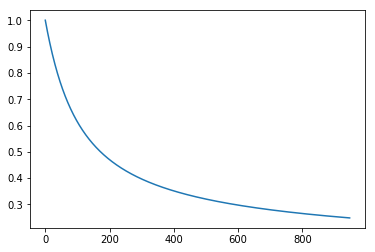

In [14]:
plt.plot(err)

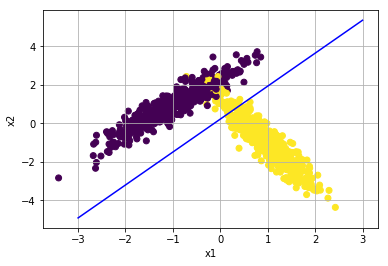

In [15]:
xplot = np.linspace(-3,3)
plt.figure(0)
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(xplot,-(theta[0]+(theta[1]*xplot))/theta[2],c='b')
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid("on")

# Sklearn

In [16]:
log = LogisticRegression(solver = 'liblinear')

In [17]:
model = log.fit(X,y)

In [18]:
print(model.coef_)

[[ 1.01627949  4.21233865 -1.80446537]]


In [19]:
model.score(X,y)

0.97799999999999998